In [1]:
В качестве набора данных будем использовать набор данных по сдаче экзаменов.
Файл содержит столбцы "Количество потраченных часов", "Оценка на предыдущем экзамене" и "Сдача\Провал"

SyntaxError: invalid syntax (4286729546.py, line 1)

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_csv('student_exam_data.csv', sep=",")

In [4]:
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [5]:
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

In [6]:
data['Study Hours'] = minmax.fit_transform(data['Study Hours'].values.reshape(-1, 1))
data['Previous Exam Score'] = minmax.fit_transform(data['Previous Exam Score'].values.reshape(-1, 1))

In [7]:
data['Previous Exam Score'] = minmax.fit_transform(data['Previous Exam Score'].values.reshape(-1, 1))

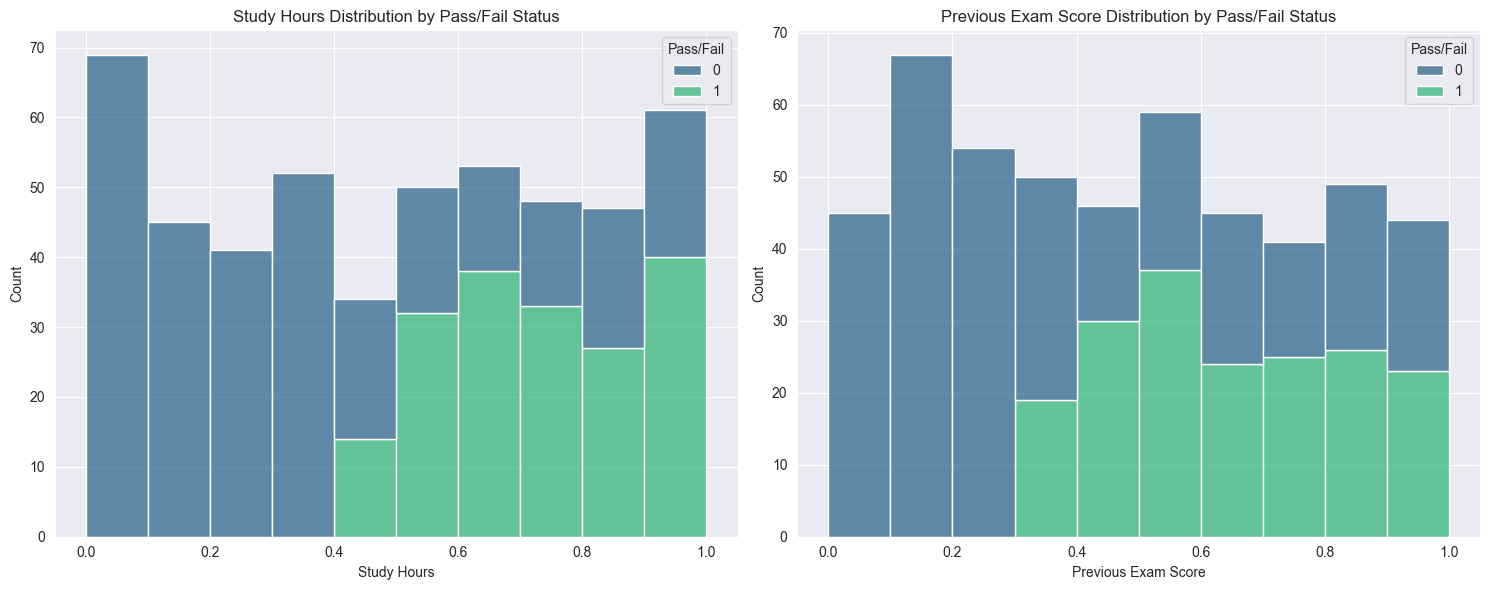

In [8]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, x='Study Hours', hue='Pass/Fail',  multiple="stack", palette="viridis")
plt.title('Study Hours Distribution by Pass/Fail Status')

plt.subplot(1, 2, 2)
sns.histplot(data, x='Previous Exam Score', hue='Pass/Fail', multiple="stack", palette="viridis")
plt.title('Previous Exam Score Distribution by Pass/Fail Status')

plt.tight_layout()
plt.show()

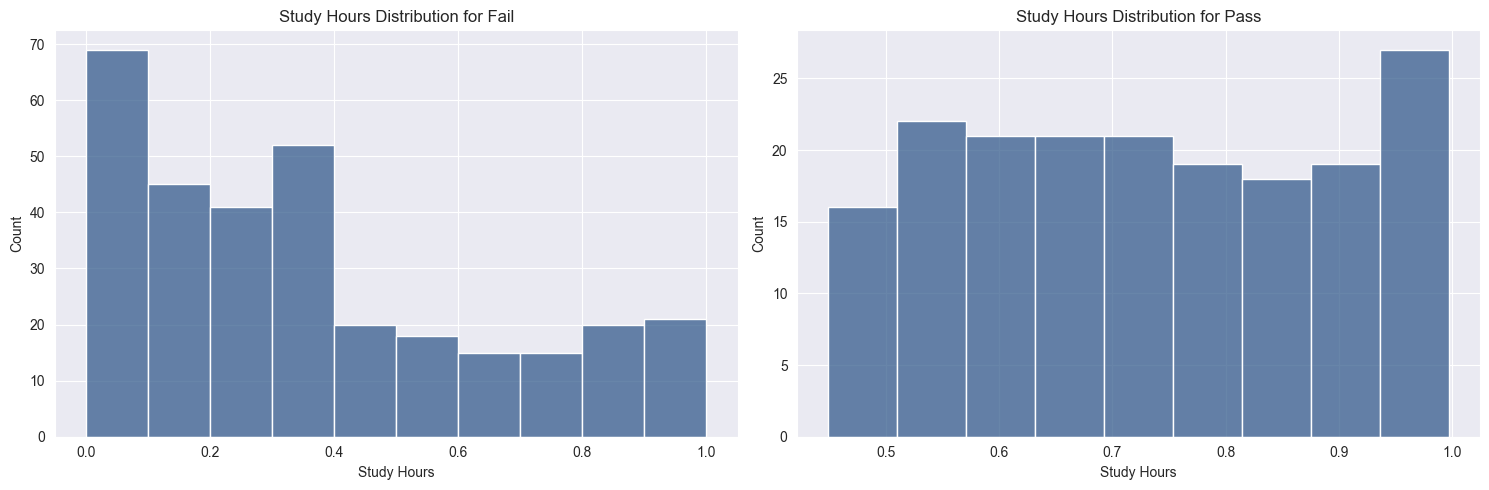

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(data.loc[data['Pass/Fail'] == 0], x="Study Hours", color=sns.color_palette("viridis")[1])
plt.title("Study Hours Distribution for Fail")

plt.subplot(1, 2, 2)
sns.histplot(data.loc[data['Pass/Fail'] == 1], x="Study Hours", color=sns.color_palette("viridis")[1])
plt.title("Study Hours Distribution for Pass")

plt.tight_layout()
plt.show()

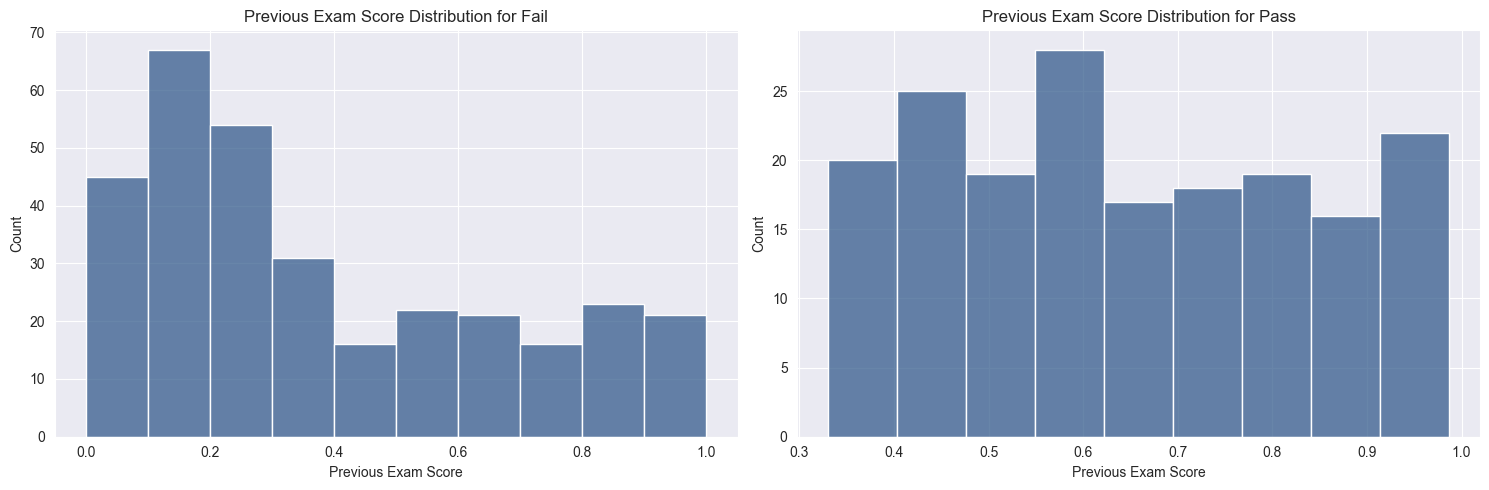

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(data.loc[data['Pass/Fail'] == 0], x="Previous Exam Score", color=sns.color_palette("viridis")[1])
plt.title("Previous Exam Score Distribution for Fail")

plt.subplot(1, 2, 2)
sns.histplot(data.loc[data['Pass/Fail'] == 1], x="Previous Exam Score", color=sns.color_palette("viridis")[1])
plt.title("Previous Exam Score Distribution for Pass")

plt.tight_layout()
plt.show()

<Axes: xlabel='Pass/Fail', ylabel='count'>

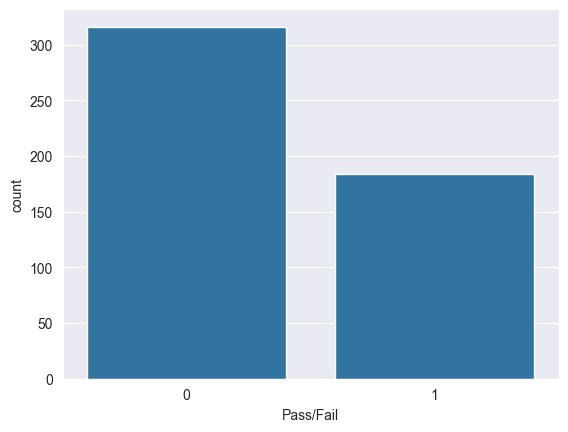

In [11]:
sns.countplot(x='Pass/Fail', data=data)

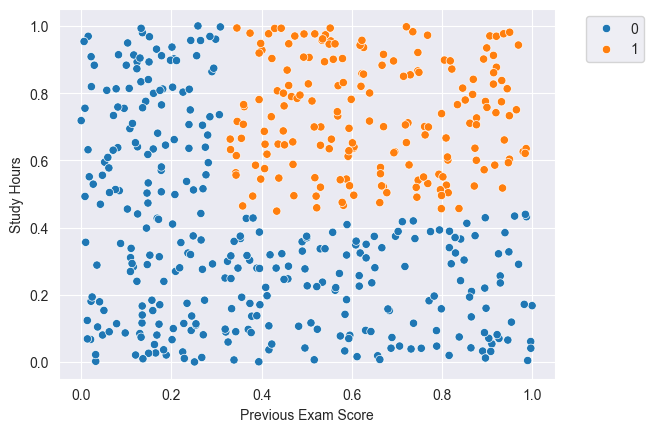

In [12]:
sns.scatterplot(x='Previous Exam Score', y='Study Hours', data=data, hue='Pass/Fail')
plt.legend(bbox_to_anchor=(1.05, 1))

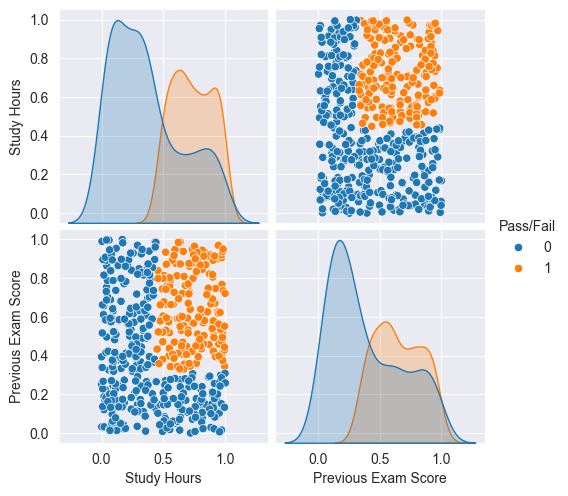

In [13]:
sns.pairplot(data, hue="Pass/Fail")

<Axes: >

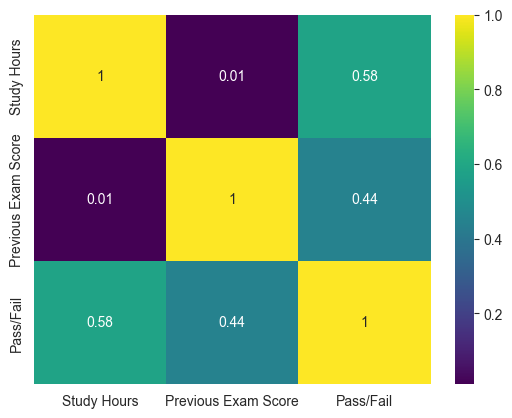

In [14]:
sns.heatmap(data.corr(), cmap='viridis', annot=True)